In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.groupby('Category').size()

Category
1    1514
2    1516
3    1501
4    1518
5    1538
6    1489
7    1508
dtype: int64

### Simple plot of the distribution of various categories of forest cover, which is the target attribute

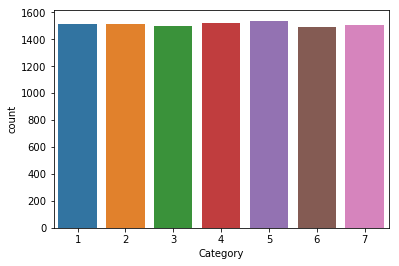

In [4]:
sns.countplot(df['Category'],label="Count")
plt.show()

### Next we check our dataset for any missing values

In [5]:
df.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [6]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Category
0,0,2934,276,10,0,0,1825,194,242,187,...,0,0,0,0,0,0,0,0,0,5
1,1,3496,265,12,351,49,1430,190,245,194,...,0,0,0,0,0,0,0,0,1,7
2,2,2493,101,14,30,0,1065,243,220,103,...,0,0,0,0,0,0,0,0,0,3
3,3,3502,150,13,330,95,3918,236,239,131,...,0,0,0,0,0,0,0,0,1,7
4,4,3076,34,10,134,-6,2218,219,218,134,...,0,0,0,0,0,0,0,0,0,1


In [7]:
X=df.drop(['Category'],axis=1)  #Seperating the label as y and the rest of attributes in X
y=df['Category']
X.iloc[0].shape

(55,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [9]:
model = keras.Sequential([
keras.layers.Dense(512,input_shape=(55,)),
keras.layers.Dense(512, activation="relu"),
keras.layers.Dense(512, activation="relu"),
keras.layers.Dense(512, activation="relu"),
keras.layers.Dense(512, activation="relu"),
keras.layers.Dense(512, activation="relu"),
keras.layers.Dense(512, activation="relu"),
keras.layers.Dense(512, activation="relu"),
keras.layers.Dense(512, activation="relu"),
keras.layers.Dense(512, activation="relu"),
keras.layers.Dense(8, activation="softmax")
])

In [10]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train,y_train, epochs=100)

Epoch 1/100
8467/8467 [==============================] - 8s 978us/step - loss: 3.9858 - accuracy: 0.2318
Epoch 2/100
8467/8467 [==============================] - 8s 981us/step - loss: 1.6599 - accuracy: 0.3008
Epoch 3/100
8467/8467 [==============================] - 9s 1ms/step - loss: 1.5008 - accuracy: 0.3555
Epoch 4/100
8467/8467 [==============================] - 10s 1ms/step - loss: 1.3397 - accuracy: 0.4197
Epoch 5/100
8467/8467 [==============================] - 11s 1ms/step - loss: 1.2036 - accuracy: 0.4816 1s - loss: 1.189 -
Epoch 6/100
8467/8467 [==============================] - 12s 1ms/step - loss: 1.1189 - accuracy: 0.5079
Epoch 7/100
8467/8467 [==============================] - 12s 1ms/step - loss: 1.0840 - accuracy: 0.5266
Epoch 8/100
8467/8467 [==============================] - 12s 1ms/step - loss: 1.0789 - accuracy: 0.5265
Epoch 9/100
8467/8467 [==============================] - 12s 1ms/step - loss: 1.0296 - accuracy: 0.5421
Epoch 10/100
8467/8467 [====================

8467/8467 [==============================] - 13s 1ms/step - loss: 0.5138 - accuracy: 0.7941
Epoch 79/100
8467/8467 [==============================] - 13s 2ms/step - loss: 0.4807 - accuracy: 0.8084
Epoch 80/100
8467/8467 [==============================] - 13s 2ms/step - loss: 0.4887 - accuracy: 0.8021
Epoch 81/100
8467/8467 [==============================] - 12s 1ms/step - loss: 0.5282 - accuracy: 0.7886 
Epoch 82/100
8467/8467 [==============================] - 12s 1ms/step - loss: 0.5106 - accuracy: 0.7921
Epoch 83/100
8467/8467 [==============================] - 12s 1ms/step - loss: 0.4661 - accuracy: 0.8182
Epoch 84/100
8467/8467 [==============================] - 12s 1ms/step - loss: 0.4528 - accuracy: 0.8205
Epoch 85/100
8467/8467 [==============================] - 12s 1ms/step - loss: 0.5857 - accuracy: 0.7771
Epoch 86/100
8467/8467 [==============================] - 12s 1ms/step - loss: 0.4675 - accuracy: 0.8167
Epoch 87/100
8467/8467 [==============================] - 12s 1ms/s

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

2117/2117 [==============================] - 0s 190us/step

Test accuracy: 0.7765706181526184

Test loss: 0.5917405916530116


In [12]:
df_test=pd.read_csv('test.csv')
df_test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0,2220,18,12,0,0,828,211,215,140,...,0,0,0,0,0,0,0,0,0,0
1,1,2139,119,10,0,0,933,237,232,125,...,0,0,0,0,0,0,0,0,0,0
2,2,2292,109,26,192,98,876,253,201,58,...,0,0,0,0,0,0,0,0,0,0
3,3,2345,92,13,0,0,459,240,220,109,...,0,0,0,0,0,0,0,0,0,0
4,4,1948,347,13,0,0,180,194,218,162,...,0,0,0,0,0,0,0,0,0,0


In [13]:
print(X_test.shape)
print(y_test.shape)
predictions=model.predict(X_test)

(2117, 55)
(2117,)


In [14]:
for p,q in zip(predictions,y_test):
    print(f'Predicted: {np.argmax(p)} Actual: {q}')

Predicted: 3 Actual: 3
Predicted: 7 Actual: 7
Predicted: 2 Actual: 2
Predicted: 2 Actual: 2
Predicted: 6 Actual: 6
Predicted: 5 Actual: 5
Predicted: 5 Actual: 5
Predicted: 1 Actual: 7
Predicted: 7 Actual: 7
Predicted: 1 Actual: 1
Predicted: 2 Actual: 1
Predicted: 5 Actual: 5
Predicted: 6 Actual: 6
Predicted: 6 Actual: 6
Predicted: 2 Actual: 5
Predicted: 5 Actual: 5
Predicted: 4 Actual: 4
Predicted: 2 Actual: 1
Predicted: 3 Actual: 3
Predicted: 5 Actual: 5
Predicted: 7 Actual: 7
Predicted: 2 Actual: 1
Predicted: 4 Actual: 4
Predicted: 2 Actual: 2
Predicted: 1 Actual: 1
Predicted: 2 Actual: 1
Predicted: 2 Actual: 2
Predicted: 2 Actual: 5
Predicted: 1 Actual: 1
Predicted: 2 Actual: 2
Predicted: 7 Actual: 7
Predicted: 3 Actual: 3
Predicted: 2 Actual: 1
Predicted: 6 Actual: 6
Predicted: 4 Actual: 4
Predicted: 4 Actual: 4
Predicted: 2 Actual: 5
Predicted: 7 Actual: 7
Predicted: 6 Actual: 6
Predicted: 1 Actual: 1
Predicted: 2 Actual: 2
Predicted: 5 Actual: 5
Predicted: 6 Actual: 6
Predicted: 

Predicted: 6 Actual: 2
Predicted: 7 Actual: 7
Predicted: 5 Actual: 5
Predicted: 4 Actual: 4
Predicted: 4 Actual: 4
Predicted: 7 Actual: 7
Predicted: 7 Actual: 7
Predicted: 5 Actual: 2
Predicted: 1 Actual: 1
Predicted: 5 Actual: 1
Predicted: 5 Actual: 1
Predicted: 6 Actual: 6
Predicted: 1 Actual: 1
Predicted: 4 Actual: 4
Predicted: 3 Actual: 3
Predicted: 3 Actual: 3
Predicted: 7 Actual: 7
Predicted: 7 Actual: 7
Predicted: 3 Actual: 2
Predicted: 4 Actual: 4
Predicted: 5 Actual: 5
Predicted: 1 Actual: 1
Predicted: 2 Actual: 2
Predicted: 2 Actual: 5
Predicted: 5 Actual: 5
Predicted: 2 Actual: 1
Predicted: 6 Actual: 2
Predicted: 4 Actual: 4
Predicted: 5 Actual: 5
Predicted: 5 Actual: 5
Predicted: 4 Actual: 4
Predicted: 7 Actual: 7
Predicted: 6 Actual: 6
Predicted: 1 Actual: 1
Predicted: 7 Actual: 7
Predicted: 3 Actual: 3
Predicted: 6 Actual: 2
Predicted: 2 Actual: 2
Predicted: 4 Actual: 4
Predicted: 3 Actual: 6
Predicted: 6 Actual: 6
Predicted: 4 Actual: 3
Predicted: 5 Actual: 5
Predicted: 

Predicted: 5 Actual: 5
Predicted: 1 Actual: 5
Predicted: 1 Actual: 1
Predicted: 6 Actual: 6
Predicted: 4 Actual: 4
Predicted: 7 Actual: 7
Predicted: 4 Actual: 4
Predicted: 1 Actual: 1
Predicted: 7 Actual: 7
Predicted: 5 Actual: 2
Predicted: 2 Actual: 2
Predicted: 6 Actual: 6
Predicted: 6 Actual: 6
Predicted: 7 Actual: 7
Predicted: 2 Actual: 2
Predicted: 6 Actual: 5
Predicted: 2 Actual: 2
Predicted: 7 Actual: 7
Predicted: 5 Actual: 5
Predicted: 2 Actual: 1
Predicted: 4 Actual: 4
Predicted: 6 Actual: 6
Predicted: 1 Actual: 2
Predicted: 4 Actual: 4
Predicted: 2 Actual: 2
Predicted: 7 Actual: 7
Predicted: 7 Actual: 7
Predicted: 4 Actual: 4
Predicted: 4 Actual: 4
Predicted: 6 Actual: 2
Predicted: 4 Actual: 6
Predicted: 5 Actual: 5
Predicted: 3 Actual: 6
Predicted: 5 Actual: 5
Predicted: 3 Actual: 3
Predicted: 5 Actual: 5
Predicted: 3 Actual: 6
Predicted: 2 Actual: 6
Predicted: 4 Actual: 4
Predicted: 3 Actual: 6
Predicted: 6 Actual: 6
Predicted: 5 Actual: 5
Predicted: 2 Actual: 1
Predicted: 